**Q1.k-Nearest Neighbours Classifier on Synthetic Data.**


**[2pts] Create the data set.**

You will “train” a kNN classifier on the following training data:

• The data is 2-dimensional points in a grid, such that the x1-coordinates and x2-coordinates both range
from −1.5 . . . 1.5, with a spacing of 0.1 between points.

• A training point, x = (x1, x2), will be classified as follows:
– Class 1 if ||x||2 ≤ 1
– Class 2 otherwise
Write code that generates this dataset and displays it using a scatterplot, using different colours for each
class.


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt


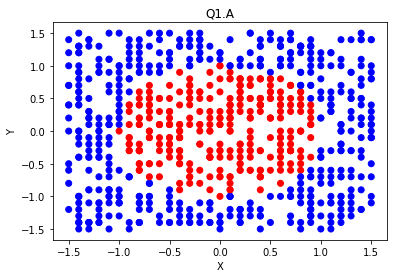

In [6]:
#Q1 a
def plotScatter(xData, yData, colors):
    plt.scatter(xData, yData,color=colors)
    plt.title('Q1.A')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def createRandomPoints(low, high, size):
    x = np.random.uniform(low=low, high=high, size =size)
    x = np.around(x,1)
    x = x.reshape([int(size/2),2])
    xData = x[:,0]
    yData = x[:,1]
    return xData, yData

def createColoredClasses(xData, yData):
    colors = []
    for x, y in zip(xData, yData):
        distance = np.linalg.norm([x,y],2)
        if distance <= 1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

xData, yData = createRandomPoints(-1.5,1.5,1500) 
colors = createColoredClasses(xData, yData)
plotScatter(xData, yData, colors)



In [7]:
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],2) <= 1 else 2)
    return Data, yData

def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test
    

In [75]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)

In [76]:
#Q1 b
class KNN:
    def __init__(self, k, num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = []
    def euclidean_distance(point1,point2): 
        return np.linalg.norm(point1-point2)
    def train(self, training_data, training_labels):
        self.parameters = []
        self.parameters.append(training_data)
        self.parameters.append(training_labels)
        pass
    def predict(self,X):
        def get_key(item):
            return item[0]
        
        def average_prediction(k, points):
            def most_common(l):
                return max(set(l),key=l.count)
            closest_points = []
            for i in range(k):
                closest_points.append(points[i])
            class_values = []
            for point in closest_points:
                class_values.append(point[2])
            return most_common(class_values)
            
        prediction = []
        for point in X:
            closest_points = []
            for training_point, classification in zip(self.parameters[0],self.parameters[1]):
                dist = np.linalg.norm(point-training_point)
                closest_points.append([dist,training_point,classification])
            
            sorted_closest_points = sorted(closest_points,key=get_key)
            prediction.append(average_prediction(self.k,sorted_closest_points))
        return prediction
    def accuracy(self, data, labels):
        num_correct = 0
        total = len(labels)
        for i in range(len(labels)):
            if(data[i]==labels[i]):
                num_correct += 1
        return num_correct/total    



In [77]:
clf = KNN(k=3, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.97

In [13]:
pred = np.array(pred)
X, Y = np.meshgrid(X_test[:,0],X_test[:,1])
fig = plt.figure()
print(pred.size)
#ax1 = plt.contourf(X, Y)
#plt.colorbar(ax1)
#plt.show()

100


<Figure size 432x288 with 0 Axes>

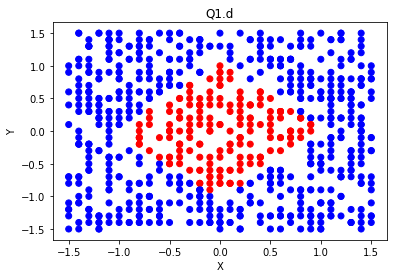

In [14]:
def plotScatter(xData, yData, colors):
    plt.scatter(xData, yData,color=colors)
    plt.title('Q1.d')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def createRandomPoints(low, high, size):
    x = np.random.uniform(low=low, high=high, size =size)
    x = np.around(x,1)
    x = x.reshape([int(size/2),2])
    xData = x[:,0]
    yData = x[:,1]
    return xData, yData

def createColoredClasses(xData, yData):
    colors = []
    for x, y in zip(xData, yData):
        distance = np.linalg.norm([x,y],1)
        if distance <= 1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

xData, yData = createRandomPoints(-1.5,1.5,1500) 
colors = createColoredClasses(xData, yData)
plotScatter(xData, yData, colors)


In [93]:
#Q1 d
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],1) <= 1 else 2)
    return Data, yData

def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test

In [94]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)

clf = KNN(k=2, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.98

In [95]:
clf = KNN(k=100, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.94

In [96]:
clf = KNN(k=400, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.78

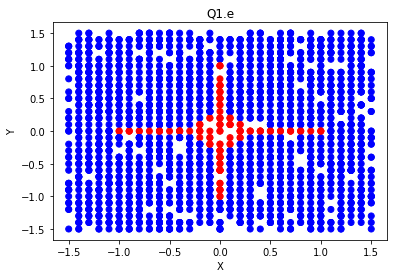

In [97]:
#Q1 e
def plotScatter(xData, yData, colors):
    plt.scatter(xData, yData,color=colors)
    plt.title('Q1.e')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def createRandomPoints(low, high, size):
    x = np.random.uniform(low=low, high=high, size =size)
    x = np.around(x,1)
    x = x.reshape([int(size/2),2])
    xData = x[:,0]
    yData = x[:,1]
    return xData, yData

def createColoredClasses(xData, yData):
    colors = []
    for x, y in zip(xData, yData):
        distance = np.linalg.norm([x,y],0.4)
        if distance <= 1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

xData, yData = createRandomPoints(-1.5,1.5,5000) 
colors = createColoredClasses(xData, yData)
plotScatter(xData, yData, colors)

In [108]:
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],.4) <= 1 else 2)
    return Data, yData

In [109]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = KNN(k=1, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.97

In [110]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = KNN(k=50, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.93

In [113]:
X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = KNN(k=200, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.94

Q2

In [116]:
#Q2
train = np.genfromtxt('mnist_train.csv', delimiter=',',
                  skip_header=1).astype(np.dtype('uint8'))#pd.io.parsers.read_csv("mnist_train.csv")
test = np.genfromtxt('mnist_test.csv', delimiter=',',
                  skip_header=1).astype(np.dtype('uint8'))

In [117]:
y_test = test[:,0]
X_test = test[:,1:785]
X_train, X_test, y_train, y_test = train_test_split(X_test,y_test,.8)

In [118]:
clf = KNN(k=1, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.806

In [119]:
clf = KNN(k=3, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.819

In [120]:
clf = KNN(k=8, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.839

In [121]:
clf = KNN(k=20, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.8495

In [127]:
clf = KNN(k=30, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.8545

In [122]:
clf = KNN(k=40, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.8545

In [124]:
clf = KNN(k=70, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.8445

In [123]:
clf = KNN(k=100, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.833

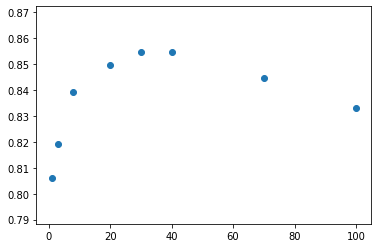

In [128]:
k_vals = [1,3,8,20,30,40,70,100]
acc = [.806,.819,.839,.8495,.8545,.8545,.8445,.833]
plt.scatter(k_vals, acc)

In [132]:
y_test = test[:,0]
X_test = test[:,1:785]
X_test = np.delete(X_test, list(range(0, X_test.shape[1], 4)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_test,y_test,.8)

In [133]:
#Q2 c
clf = KNN(k=30, num_classes=2)
clf.train(X_train, y_train)
pred = clf.predict(X_test)
clf.accuracy(y_test, pred)

0.8375

In [ ]:
#Q3

In [ ]:
from scipy import integrate
f = lambda x,y : pow(x-y,2)

In [ ]:
integrate.dblquad(f(2,6),0,1)

In [54]:
#Q4
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data set D1
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],1) <= 1 else 2)
    return Data, yData

def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test
    

X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))





Accuracy: 0.98


In [47]:
#Data set D2
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],2) <= 1 else 2)
    return Data, yData
    

X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.99


In [36]:
#Data set D4
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],4) <= 1 else 2)
    return Data, yData
    

X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.98


In [50]:
#Data set D.4
def createRandomPoints(low, high, size):
    Data = np.random.uniform(low=low, high=high, size =int(size*2))
    Data = np.around(Data,1)
    Data = Data.reshape([int(size),2])
    x1Data = Data[:,0]
    x2Data = Data[:,1]
    yData = []
    
    for i,j in zip(x1Data,x2Data):
        yData.append(1 if np.linalg.norm([i,j],.4) <= 1 else 2)
    return Data, yData
    

X, y =createRandomPoints(-1.5,1.5,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,0.8)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


In [52]:
def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test

In [61]:
train = np.genfromtxt('mnist_train.csv', delimiter=',',
                  skip_header=1).astype(np.dtype('uint8'))#pd.io.parsers.read_csv("mnist_train.csv")
test = np.genfromtxt('mnist_test.csv', delimiter=',',
                  skip_header=1).astype(np.dtype('uint8'))

In [139]:
y_train = train[:,0]
X_train = train[:,1:785]


In [140]:
def train_test_split(X,y,test_size):
    assert (test_size < 1  and test_size > 0) , "Invalid percentage range"
    cutting_val = int(len(X)*test_size)
    X_train = X[:cutting_val]
    X_test = X[cutting_val:]
    y_train = y[:cutting_val]
    y_test = y[cutting_val:]
    return X_train,X_test, y_train, y_test

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_test,y_test,.8)

In [142]:
#validation 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8749166666666667
